Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Lyubomira Dimitrova"
COLLABORATORS = "Maryna Charniuk, Dung Nguyen"

---

# Schiebe-Puzzle (40 Punkte)

Sie kennen sicherlich das Schiebepuzzle, bei dem man eine zufällige Ausgangsstellung sortieren muss, indem man in jedem Zug ein Zahlenfeld auf die Lücke verschiebt:  

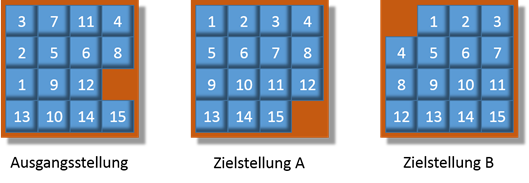


Es gibt $16! ≈ 2.1*10^{13}$ Ausgangsstellungen. Genau die Hälfte davon können in die Zielstellung A, die andere Hälfte in die Zielstellung B überführt werden, aber keine in beide. Die Stellung links lässt sich in 19 Zügen nach A transformieren. Für die schwierigsten Stellungen benötigt man 80 Züge bis zum Ziel. Mit einem einfachen Python-Programm wie in dieser Aufgabe kann man in akzeptabler Zeit Lösungswege mit bis zu 20 Zügen finden.     

a) **(3 Points)**  
Die aktuelle Stellung wird in einem Array der Länge 16 repräsentiert, das die Zahlen und das Leerzeichen enthält. Schreiben Sie eine Funktion ***print_pos(p)***, die die Stellung p formatiert auf die Konsole ausgibt:  

```python
>>> p = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ' ']   
>>> print_pos(p)   # penthält hier die Zielstellung A  
"""
 1  2  3  4  
 5  6  7  8  
 9 10 11 12  
13 14 15
"""
```


In [2]:
def print_pos(p):
    """
    The function receives an array of length 16 containing the numbers and the space
    and prints it in the format of puzzle square. 
    
    Arguments:
    p -- an array of length 16 containing the numbers and the space, 
    for example p = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ' ']
    """
    print(''.join(['{:3}'.format(p[i]) if (i+1)%4 != 0 else '{:3}\n'.format(p[i]) for i in range(16)]))

In [3]:
start = [3,7,11,4,2,5,6,8,1,9,12,'',13,10,14,15]
A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ' ']
B = [' ', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
print('-------- start --------')
print_pos(start)
print('-------- A --------')
print_pos(A)
print('-------- B --------')
print_pos(B)

-------- start --------
  3  7 11  4
  2  5  6  8
  1  9 12   
 13 10 14 15

-------- A --------
  1  2  3  4
  5  6  7  8
  9 10 11 12
 13 14 15   

-------- B --------
     1  2  3
  4  5  6  7
  8  9 10 11
 12 13 14 15



b) **(12 Punkte)**  
Erzeugen Sie lösbare Ausgangsstellungen, indem Sie die Zielstellung A mittels Zufallszahlen verwürfeln. Schreiben Sie eine Funktion `shuffle_pos(N)`, die von Zielstellung A beginnend N zufällige Züge ausführt und die resultierende Stellung zurückgibt. Die möglichen Züge "up" (verschiebe das Feld unterhalb der Lücke nach oben), "left" (verschiebe das Feld rechts der Lücke nach links), "down" und "right" werden dabei durch Zufallszahlen 0…3 ausgewählt. Wenn die Lücke sich am Rand des Spielfelds befindet, sind allerdings nicht alle Züge erlaubt (in Stellung A sind z.B. nur "right" und "down" möglich). Lösen Sie dieses Problem durch *rejection sampling*: Wenn die gewählte Zufallszahl einen unerlaubten Zug bezeichnet, wird sie ignoriert und eine neue gezogen. Ignorieren Sie gleichfalls Zufallszahlen, die den vorhergehenden Zug wieder rückgängig machen (es ist also z.B. verboten, nach "up" sofort "down" auszuführen).

**Hinweis:**
Um den Test zu erfüllen müssen Sie den Anweisungen genau Folge leisten. Benutzen Sie `random.randint(0, 3)` um Zufallszahlen zu generieren.

In [4]:
import random

allowed_moves = {i:set() for i in range(16)}
for i in range(16):
    if i > 3:
        allowed_moves[i].add(2)
    if i < 12:
        allowed_moves[i].add(0)
    if i % 4 != 0:
        allowed_moves[i].add(3)
    if (i + 1) % 4 != 0:
        allowed_moves[i].add(1)

shift = {0:4, 1:1, 2:-4, 3:-1}    # how to find the new index of the gap, depending on the move;
                                  # e.g. move 0 (up), the gap was at index i -> the new index is i+4


def shuffle_pos(N):
    """
    The function scrambles the target position A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ' ']
    randomly by N times.

    Arguments:
    N -- number of times of scrambling

    Returns:
    A -- scrambled position after N times of randomly scrambling
    """
    A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ' ']
    
    last_move = -1
    for i in range(N):
        gap = A.index(' ')
        move = random.randint(0, 3)
        while move not in allowed_moves[gap] or abs(move - last_move)  == 2:
            move = random.randint(0, 3)
        
        index_of_new_gap = gap + shift[move]
        A[gap], A[index_of_new_gap] = A[index_of_new_gap], A[gap]  
        
        last_move = move
    
    return A

In [5]:
random.seed(1)
assert shuffle_pos(1) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ' ', 13, 14, 15, 12]
assert shuffle_pos(2) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ' ', 14, 15]
assert shuffle_pos(3) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ' ', 13, 14, 15]
assert shuffle_pos(4) == [1, 2, 3, 4, 5, 6, 7, 8, ' ', 10, 11, 12, 9, 13, 14, 15]
assert shuffle_pos(5) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 10, 11, 13, 15, ' ', 12]

random.seed(2)
assert shuffle_pos(1) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ' ', 13, 14, 15, 12]
assert shuffle_pos(2) == [1, 2, 3, 4, 5, 6, 7, ' ', 9, 10, 11, 8, 13, 14, 15, 12]
assert shuffle_pos(3) == [1, 2, 3, 4, 5, 6, 7, 8, 9, ' ', 11, 12, 13, 10, 14, 15]
assert shuffle_pos(4) == [1, 2, 3, 4, 5, ' ', 6, 8, 9, 10, 7, 12, 13, 14, 11, 15]
assert shuffle_pos(5) == [1, 2, 3, 4, 5, 6, 7, 8, 9, 14, 10, 11, 13, 15, ' ', 12]

c)	**(25 Points)**  
Man kann die kürzeste Zugfolge zum Ziel mittels Breitensuche finden. Dabei bezeichnet jeder Knoten des Graphen eine Stellung. Stellungen, die durch einen einzigen Zug ineinander übergehen, werden durch Kanten verbunden. Allerdings kann man diesen Graphen nicht vollständig erzeugen, weil er mit 16! Knoten viel zu groß wäre. Deshalb muss der Standardalgorithmus aus der Vorlesung modifiziert werden:  
> *	Man erzeugt die Knoten des Graphen *on the fly*, also erst dann, wenn sie in der Schleife über die Nachbarn tatsächlich benötigt werden. Die Suche wird bei einer gegebenen Suchtiefe abgebrochen, falls bis dahin keine Lösung gefunden wurde.  
  
> * Das Array `parents` muss jetzt vom Typ `dict` sein und enthält anfangs nur die Ausgangsstellung. Wird eine Stellung p erstmals erreicht, legt man für sie einen Eintrag in `parents` an. Als Schlüssel wird dabei die Stringdarstellung `str(p)` verwendet (`p` kann nicht direkt als Schlüssel dienen, weil Python für Arrays keine Hashfunktion definiert). Der zugehörige Wert ist der Vaterknoten, also die Stellung, von wo aus der aktuelle Knoten erreicht wurde (dies ist nützlich, um am Ende den Lösungsweg zurückverfolgen und ausdrucken zu können). **Alterntiv können Sie ein zusätzliches Feld oder eine zusätzliche Liste verwenden um alle besuchten Positionen zu speichern und diese später auszugeben.**  

Implementieren Sie die Funktion `solve_pos(p, maxmove)`, die nach Lösungen mit maximal `maxmove` Zügen sucht. Wird eine Lösung gefunden, sollen die Anzahl der Züge und der Lösungsweg ausgedruckt werden, also alle Stellungen von der Ausgangsstellung bis zum Ziel. Andernfalls wird nur die Ausgangsstellung mit der Bemerkung **"unsolved"** ausgedruckt. Testen Sie, dass für die Ausgangsstellung im obigen Bild tatsächlich 19 Züge benötigt werden. Erzeugen Sie mit der Funktion `shuffle_pos()` aus b) weitere Ausgangsstellungen und geben Sie die Lösungen dafür aus.

In [6]:
from collections import deque     # You may need to use queue data structure.
from copy import deepcopy         # You may need to use deep copy.

            
def solve_pos(p, maxmove):
    """
    The function looks for solutions with maximum 'maxmove' moves, for a puzzle starts with the position 'p' targeted at
    A = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ' ']. 
    The function prints all the positions at each move, and returns the total number of moves.
    
    Arguments:
    p -- an array of length 16 containing the numbers and the space, which is the starting position
    maxmove -- maximum number of moves allowed
    
    Returns:
    move -- total number of moves
    
    """
    
    queue = deque()
    parents = {str(p): None}
    marked = {str(p): 0}    # depth/number of moves needed to reach a particular state
    queue.append(p)
    
    while marked[str(queue[0])] <= maxmove:
        
        u = queue.popleft()
        
        if u == A:
            states = [u]
            while u != p:
                states.append(parents[str(u)])
                u = parents[str(u)]
            for state in states[::-1]:
                #print(state)     # for list output
                print_pos(state)
            break
            
        for v in neighbors(u):
            if str(v) not in marked:
                marked[str(v)] = marked[str(u)] + 1
                parents[str(v)] = u
                queue.append(v)
    
                
    if str(A) not in marked:
        #print(p, '\nunsolved')
        print_pos(p)
        print(unsolved)
        return None
    else:
        move = marked[str(A)]
        return move 

def neighbors(p):
    gap = p.index(' ')
    for move in allowed_moves[gap]:
        x = deepcopy(p)
        index_of_new_gap = gap + shift[move]
        x[gap], x[index_of_new_gap] = x[index_of_new_gap], x[gap]
        yield x



In [7]:
import time
import random
random.seed(123)

p = shuffle_pos(4)
start = time.clock()
assert solve_pos(p, 20) == 4
end = time.clock()
print('CPU time: %.2f ms'%((end-start)*1000))

p = shuffle_pos(8)
start = time.clock()
assert solve_pos(p, 20) == 8
end = time.clock()
print('CPU time: %.2f ms'%((end-start)*1000))

p = [3, 7, 11, 4, 2, 5, 6, 8, 1, 9, 12, ' ', 13, 10, 14, 15]
start = time.clock()
assert solve_pos(p, 20) == 19
end = time.clock()
print('CPU time: %.2f ms'%((end-start)*1000))


  1  2  3  4
  5     6  8
  9 10  7 11
 13 14 15 12

  1  2  3  4
  5  6     8
  9 10  7 11
 13 14 15 12

  1  2  3  4
  5  6  7  8
  9 10    11
 13 14 15 12

  1  2  3  4
  5  6  7  8
  9 10 11   
 13 14 15 12

  1  2  3  4
  5  6  7  8
  9 10 11 12
 13 14 15   

CPU time: 16.60 ms
  1  2  7  3
  5 10  6  4
  9 14 11  8
 13    15 12

  1  2  7  3
  5 10  6  4
  9    11  8
 13 14 15 12

  1  2  7  3
  5     6  4
  9 10 11  8
 13 14 15 12

  1  2  7  3
  5  6     4
  9 10 11  8
 13 14 15 12

  1  2     3
  5  6  7  4
  9 10 11  8
 13 14 15 12

  1  2  3   
  5  6  7  4
  9 10 11  8
 13 14 15 12

  1  2  3  4
  5  6  7   
  9 10 11  8
 13 14 15 12

  1  2  3  4
  5  6  7  8
  9 10 11   
 13 14 15 12

  1  2  3  4
  5  6  7  8
  9 10 11 12
 13 14 15   

CPU time: 121.81 ms
  3  7 11  4
  2  5  6  8
  1  9 12   
 13 10 14 15

  3  7 11  4
  2  5  6  8
  1  9    12
 13 10 14 15

  3  7 11  4
  2  5     8
  1  9  6 12
 13 10 14 15

  3  7     4
  2  5 11  8
  1  9  6 12
 13 10 14 15

  3    

Output as lists: <br><br>

[1, 2, 3, 4, 5, ' ', 6, 8, 9, 10, 7, 11, 13, 14, 15, 12] <br>
[1, 2, 3, 4, 5, 6, ' ', 8, 9, 10, 7, 11, 13, 14, 15, 12] <br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ' ', 11, 13, 14, 15, 12]<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ' ', 13, 14, 15, 12]<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ' ']<br>
CPU time: 13.86 ms<br>
[1, 2, 7, 3, 5, 10, 6, 4, 9, 14, 11, 8, 13, ' ', 15, 12]<br>
[1, 2, 7, 3, 5, 10, 6, 4, 9, ' ', 11, 8, 13, 14, 15, 12]<br>
[1, 2, 7, 3, 5, ' ', 6, 4, 9, 10, 11, 8, 13, 14, 15, 12]<br>
[1, 2, 7, 3, 5, 6, ' ', 4, 9, 10, 11, 8, 13, 14, 15, 12]<br>
[1, 2, ' ', 3, 5, 6, 7, 4, 9, 10, 11, 8, 13, 14, 15, 12]<br>
[1, 2, 3, ' ', 5, 6, 7, 4, 9, 10, 11, 8, 13, 14, 15, 12]<br>
[1, 2, 3, 4, 5, 6, 7, ' ', 9, 10, 11, 8, 13, 14, 15, 12]<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ' ', 13, 14, 15, 12]<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ' ']<br>
CPU time: 124.15 ms<br>
[3, 7, 11, 4, 2, 5, 6, 8, 1, 9, 12, ' ', 13, 10, 14, 15]<br>
[3, 7, 11, 4, 2, 5, 6, 8, 1, 9, ' ', 12, 13, 10, 14, 15]<br>
[3, 7, 11, 4, 2, 5, ' ', 8, 1, 9, 6, 12, 13, 10, 14, 15]<br>
[3, 7, ' ', 4, 2, 5, 11, 8, 1, 9, 6, 12, 13, 10, 14, 15]<br>
[3, ' ', 7, 4, 2, 5, 11, 8, 1, 9, 6, 12, 13, 10, 14, 15]<br>
[' ', 3, 7, 4, 2, 5, 11, 8, 1, 9, 6, 12, 13, 10, 14, 15]<br>
[2, 3, 7, 4, ' ', 5, 11, 8, 1, 9, 6, 12, 13, 10, 14, 15]<br>
[2, 3, 7, 4, 1, 5, 11, 8, ' ', 9, 6, 12, 13, 10, 14, 15]<br>
[2, 3, 7, 4, 1, 5, 11, 8, 9, ' ', 6, 12, 13, 10, 14, 15]<br>
[2, 3, 7, 4, 1, 5, 11, 8, 9, 6, ' ', 12, 13, 10, 14, 15]<br>
[2, 3, 7, 4, 1, 5, ' ', 8, 9, 6, 11, 12, 13, 10, 14, 15]<br>
[2, 3, ' ', 4, 1, 5, 7, 8, 9, 6, 11, 12, 13, 10, 14, 15]<br>
[2, ' ', 3, 4, 1, 5, 7, 8, 9, 6, 11, 12, 13, 10, 14, 15]<br>
[' ', 2, 3, 4, 1, 5, 7, 8, 9, 6, 11, 12, 13, 10, 14, 15]<br>
[1, 2, 3, 4, ' ', 5, 7, 8, 9, 6, 11, 12, 13, 10, 14, 15]<br>
[1, 2, 3, 4, 5, ' ', 7, 8, 9, 6, 11, 12, 13, 10, 14, 15]<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, ' ', 11, 12, 13, 10, 14, 15]<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ' ', 14, 15]<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, ' ', 15]<br>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ' ']<br>
CPU time: 243510.09 ms